In [6]:
library(ggplot2)
library(segmented)
options(repr.plot.width=10, repr.plot.height=3)

In [2]:
r=read.table("../Tables/morphological_gradients.csv",sep=',',header=T)

r=r[r$time==5,]
r$rep=as.factor(r$rep)


In [20]:
df_tot=NULL

variable replicate davies p val         davies est       
[1,] volume   I         8.46168505376666e-15 0.103040544707931
[2,] volume   II        1.1591695636292e-36  0.103040544707931
     break-point       se                  p-value              slope1  CI.l1  
[1,] 0.102597052031679 0.00222734847517    3.68018093543166e-09 -771.56 -1008.4
[2,] 0.101038317788396 0.00104815944181222 0.0019775774979863   -206.87 -336.05
     CI.u1   slope2 CI.l2  CI.u2  Rsq               slope-lm        
[1,] -534.72 1541.7 1116.7 1966.8 0.493727828761961 42.65055658285  
[2,] -77.678 2414.1 2196.9 2631.3 0.923338308693313 790.098179707648
     p-value-lm         Rsq-lm             
[1,] 0.573036466040429  0.00309397538364985
[2,] 1.374631711756e-20 0.56997903455554

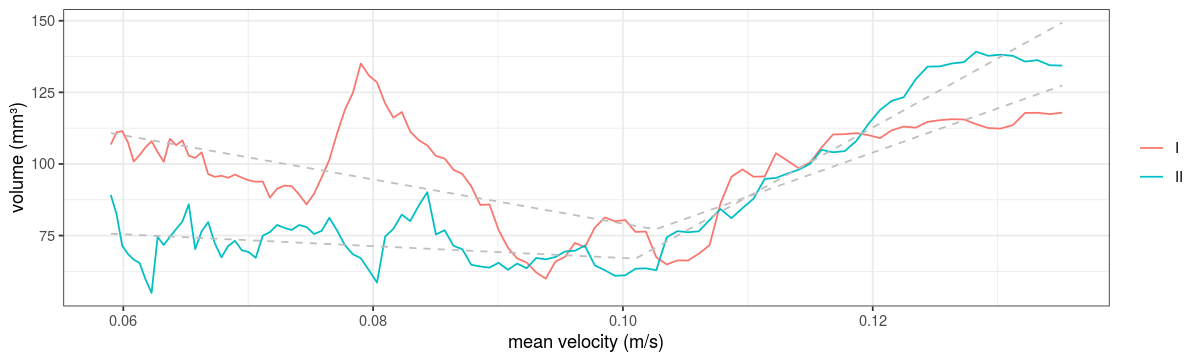

In [21]:
var='volume'
p=ggplot(r, aes(x=speed, y=vol, color=rep))+
geom_line()+theme_bw()+theme(legend.title=element_blank())+ylab('volume (mm³)')+xlab('mean velocity (m/s)')
df=NULL
for (i in unique(r$rep)){
    d=r[r$rep==i,]
    my.lm <- lm(vol ~ speed, data=d)
    my.seg <- segmented(my.lm, 
                    seg.Z = ~ speed, 
                    psi = list(speed = c(0.1)))
    my.fitted <- fitted(my.seg)
    my.model <- data.frame(Distance = d$speed, Elevation = my.fitted)
    my.lines <- my.seg$psi[, 2]
    davies=davies.test(my.lm, k=13)
    davies_pval=davies$p.value
    davies_est=davies$statistic
    p=p+geom_line(data = my.model, aes(x = Distance, y = Elevation), color='gray',linetype = 2)
    df=rbind(df,c(var,i,davies_pval,davies_est,my.seg$psi[2],my.seg$psi[3], summary(my.seg)$coefficients[2,4],slope(my.seg)$speed[1,c(1,4,5)],slope(my.seg)$speed[2,c(1,4,5)],summary(my.seg)$r.squared,coefficients(summary(my.lm))[2,1],coefficients(summary(my.lm))[2,4],summary(my.lm)$r.squared))}
colnames(df)=c('variable','replicate','davies p val','davies est','break-point','se','p-value','slope1','CI.l1','CI.u1','slope2','CI.l2','CI.u2','Rsq','slope-lm','p-value-lm','Rsq-lm')
df_tot=rbind(df_tot,df)
p1=p
df_tot
p1

variable   replicate davies p val         davies est       
[1,] volume     I         8.46168505376666e-15 0.103040544707931
[2,] volume     II        1.1591695636292e-36  0.103040544707931
[3,] growth_rel I         7.63673887747038e-20 0.103040544707931
[4,] growth_rel II        1.66223165946402e-22 0.103040544707931
     break-point       se                  p-value              slope1  CI.l1  
[1,] 0.102597052031679 0.00222734847517    3.68018093543166e-09 -771.56 -1008.4
[2,] 0.101038317788396 0.00104815944181222 0.0019775774979863   -206.87 -336.05
[3,] 0.104222872202864 0.00176906327131081 0.00100295628208217  -39.396 -62.458
[4,] 0.101003288513863 0.00161789766930936 0.612519596367645    -8.511  -41.742
     CI.u1   slope2 CI.l2  CI.u2  Rsq               slope-lm        
[1,] -534.72 1541.7 1116.7 1966.8 0.493727828761961 42.65055658285  
[2,] -77.678 2414.1 2196.9 2631.3 0.923338308693313 790.098179707648
[3,] -16.333 263.71 216.43 310.98 0.721002633178038 58.4959756952644
[4,] 24.72   409.98 357.59 462.38 0.861216798208539 150.944790209214
     p-value-lm           Rsq-lm             
[1,] 0.573036466040429    0.00309397538364985
[2,] 1.374631711756e-20   0.56997903455554   
[3,] 1.04625295134795e-09 0.304571549014279  
[4,] 2.91322988716552e-22 0.600788170673914

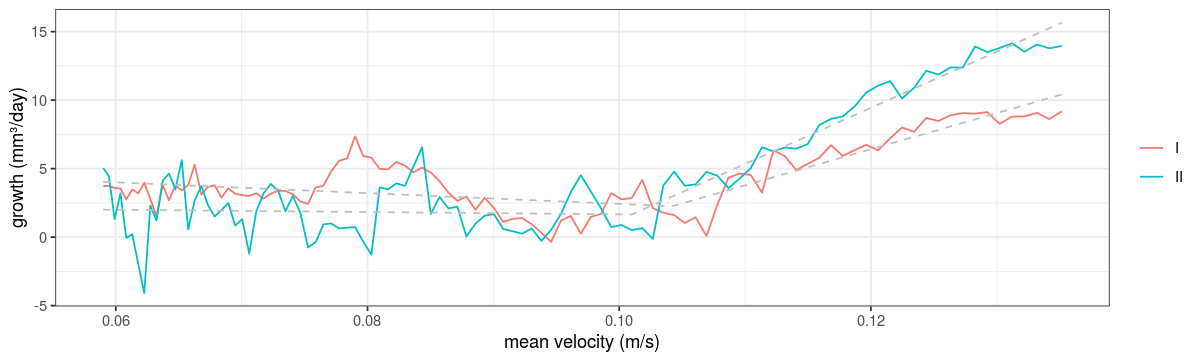

In [22]:
var='growth_rel'
p=ggplot(r, aes(x=speed, y=growth, color=rep))+
geom_line()+theme_bw()+theme(legend.title=element_blank())+ylab('growth (mm³/day)')+xlab('mean velocity (m/s)')
df=NULL
for (i in unique(r$rep)){
    d=r[r$rep==i,]
    my.lm <- lm(growth ~ speed, data=d)
    my.seg <- segmented(my.lm, 
                    seg.Z = ~ speed, 
                    psi = list(speed = c(0.1)))
    my.fitted <- fitted(my.seg)
    my.model <- data.frame(Distance = d$speed, Elevation = my.fitted)
    my.lines <- my.seg$psi[, 2]
    davies=davies.test(my.lm, k=13)
    davies_pval=davies$p.value
    davies_est=davies$statistic
    p=p+geom_line(data = my.model, aes(x = Distance, y = Elevation), color='gray',linetype = 2)
    df=rbind(df,c(var,i,davies_pval,davies_est,my.seg$psi[2],my.seg$psi[3], summary(my.seg)$coefficients[2,4],slope(my.seg)$speed[1,c(1,4,5)],slope(my.seg)$speed[2,c(1,4,5)],summary(my.seg)$r.squared,coefficients(summary(my.lm))[2,1],coefficients(summary(my.lm))[2,4],summary(my.lm)$r.squared))}
colnames(df)=c('variable','replicate','davies p val','davies est','break-point','se','p-value','slope1','CI.l1','CI.u1','slope2','CI.l2','CI.u2','Rsq','slope-lm','p-value-lm','Rsq-lm')
df_tot=rbind(df_tot,df)
p2=p
df_tot
p2

variable       replicate davies p val         davies est        
[1,] volume         I         8.46168505376666e-15 0.103040544707931 
[2,] volume         II        1.1591695636292e-36  0.103040544707931 
[3,] growth_rel     I         7.63673887747038e-20 0.103040544707931 
[4,] growth_rel     II        1.66223165946402e-22 0.103040544707931 
[5,] maximum height I         7.81243537508723e-10 0.115493950984604 
[6,] maximum height II        0.0656551261987998   0.0968138415695947
     break-point        se                  p-value              slope1 
[1,] 0.102597052031679  0.00222734847517    3.68018093543166e-09 -771.56
[2,] 0.101038317788396  0.00104815944181222 0.0019775774979863   -206.87
[3,] 0.104222872202864  0.00176906327131081 0.00100295628208217  -39.396
[4,] 0.101003288513863  0.00161789766930936 0.612519596367645    -8.511 
[5,] 0.114979295781702  0.00226209979727066 1.56540040244437e-17 -1.4353
[6,] 0.0977490796587596 0.00812352941396441 2.2967990897448e-16  -4.7885
     CI.l1   CI.u1   slope2  CI.l2  CI.u2   Rsq               slope-lm         
[1,] -1008.4 -534.72 1541.7  1116.7 1966.8  0.493727828761961 42.65055658285   
[2,] -336.05 -77.678 2414.1  2196.9 2631.3  0.923338308693313 790.098179707648 
[3,] -62.458 -16.333 263.71  216.43 310.98  0.721002633178038 58.4959756952644 
[4,] -41.742 24.72   409.98  357.59 462.38  0.861216798208539 150.944790209214 
[5,] -1.7106 -1.1601 -5.706  -7.116 -4.2959 0.85810343679931  -2.08935304907361
[6,] -5.7563 -3.8207 -2.5718 -3.835 -1.3086 0.796582561830967 -3.80897126072507
     p-value-lm           Rsq-lm             
[1,] 0.573036466040429    0.00309397538364985
[2,] 1.374631711756e-20   0.56997903455554   
[3,] 1.04625295134795e-09 0.304571549014279  
[4,] 2.91322988716552e-22 0.600788170673914  
[5,] 2.64780587193156e-35 0.776630715677992  
[6,] 1.01301328514393e-35 0.780748354654365

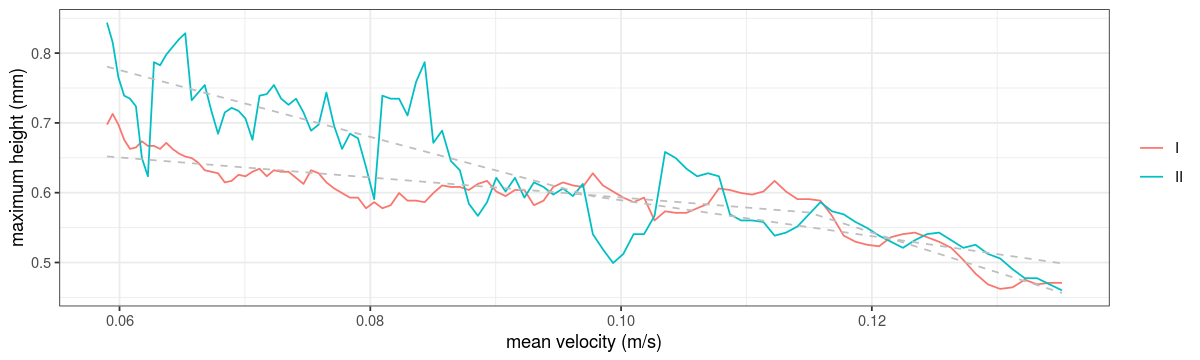

In [23]:
var='maximum height'
p=ggplot(r, aes(x=speed, y=max_height, color=rep))+
geom_line()+theme_bw()+theme(legend.title=element_blank())+ylab('maximum height (mm)')+xlab('mean velocity (m/s)')
df=NULL
for (i in unique(r$rep)){
    d=r[r$rep==i,]
    my.lm <- lm(max_height ~ speed, data=d, na.action=na.exclude)
    my.seg <- segmented(my.lm, 
                    seg.Z = ~ speed, 
                    psi = list(speed = c(0.1)))
    my.fitted <- fitted(my.seg)
    my.model <- data.frame(Distance = d$speed, Elevation = my.fitted)
    davies=davies.test(my.lm, k=13)
    davies_pval=davies$p.value
    davies_est=davies$statistic
    p=p+geom_line(data = my.model, aes(x = Distance, y = Elevation), color='gray',linetype = 2)
    df=rbind(df,c(var,i,davies_pval,davies_est,my.seg$psi[2],my.seg$psi[3], summary(my.seg)$coefficients[2,4],slope(my.seg)$speed[1,c(1,4,5)],slope(my.seg)$speed[2,c(1,4,5)],summary(my.seg)$r.squared,coefficients(summary(my.lm))[2,1],coefficients(summary(my.lm))[2,4],summary(my.lm)$r.squared))}
colnames(df)=c('variable','replicate','davies p val','davies est','break-point','se','p-value','slope1','CI.l1','CI.u1','slope2','CI.l2','CI.u2','Rsq','slope-lm','p-value-lm','Rsq-lm')
df_tot=rbind(df_tot,df)
p3=p
df_tot
p3

variable       replicate davies p val         davies est        
[1,] volume         I         8.46168505376666e-15 0.103040544707931 
[2,] volume         II        1.1591695636292e-36  0.103040544707931 
[3,] growth_rel     I         7.63673887747038e-20 0.103040544707931 
[4,] growth_rel     II        1.66223165946402e-22 0.103040544707931 
[5,] maximum height I         7.81243537508723e-10 0.115493950984604 
[6,] maximum height II        0.0656551261987998   0.0968138415695947
[7,] coverage       I         2.15965511537142e-23 0.103040544707931 
[8,] coverage       II        1.13207697459402e-21 0.0905871384312582
     break-point        se                  p-value              slope1 
[1,] 0.102597052031679  0.00222734847517    3.68018093543166e-09 -771.56
[2,] 0.101038317788396  0.00104815944181222 0.0019775774979863   -206.87
[3,] 0.104222872202864  0.00176906327131081 0.00100295628208217  -39.396
[4,] 0.101003288513863  0.00161789766930936 0.612519596367645    -8.511 
[5,] 0.114979295781702  0.00226209979727066 1.56540040244437e-17 -1.4353
[6,] 0.0977490796587596 0.00812352941396441 2.2967990897448e-16  -4.7885
[7,] 0.103509661646369  0.00159811658048434 6.58711006779581e-17 -400.51
[8,] 0.0930512441789158 0.00165766132899621 0.00765312528228913  -80.456
     CI.l1   CI.u1   slope2  CI.l2  CI.u2   Rsq               slope-lm         
[1,] -1008.4 -534.72 1541.7  1116.7 1966.8  0.493727828761961 42.65055658285   
[2,] -336.05 -77.678 2414.1  2196.9 2631.3  0.923338308693313 790.098179707648 
[3,] -62.458 -16.333 263.71  216.43 310.98  0.721002633178038 58.4959756952644 
[4,] -41.742 24.72   409.98  357.59 462.38  0.861216798208539 150.944790209214 
[5,] -1.7106 -1.1601 -5.706  -7.116 -4.2959 0.85810343679931  -2.08935304907361
[6,] -5.7563 -3.8207 -2.5718 -3.835 -1.3086 0.796582561830967 -3.80897126072507
[7,] -479.48 -321.54 763.74  601.87 925.62  0.658899666388551 -9.7874912235418 
[8,] -139.1  -21.812 442.31  392.22 492.4   0.858736173061603 197.690868748248 
     p-value-lm           Rsq-lm              
[1,] 0.573036466040429    0.00309397538364985 
[2,] 1.374631711756e-20   0.56997903455554    
[3,] 1.04625295134795e-09 0.304571549014279   
[4,] 2.91322988716552e-22 0.600788170673914   
[5,] 2.64780587193156e-35 0.776630715677992   
[6,] 1.01301328514393e-35 0.780748354654365   
[7,] 0.762681307260293    0.000889162635683834
[8,] 2.20371007506285e-22 0.602932655284879

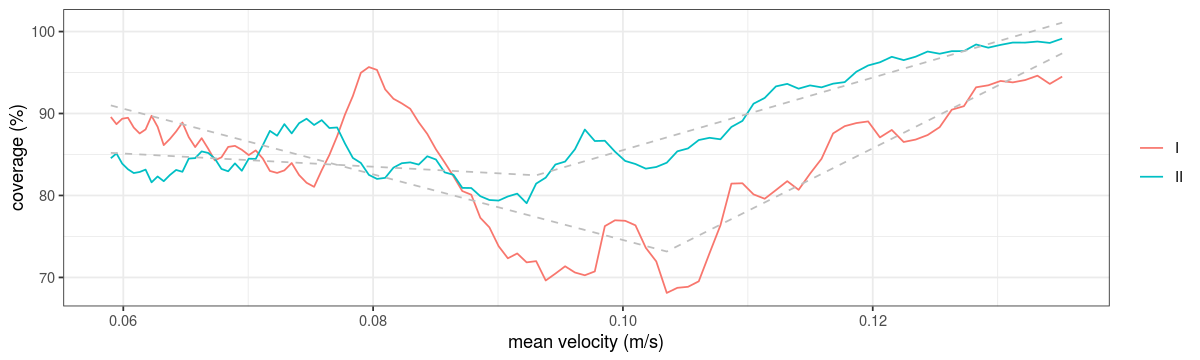

In [24]:
var='coverage'
p=ggplot(r, aes(x=speed, y=cov, color=rep))+
geom_line()+theme_bw()+theme(legend.title=element_blank())+ylab('coverage (%)')+xlab('mean velocity (m/s)')
df=NULL
for (i in unique(r$rep)){
    d=r[r$rep==i,]
    my.lm <- lm(cov ~ speed, data=d, na.action=na.exclude)
    my.seg <- segmented(my.lm, 
                    seg.Z = ~ speed, 
                    psi = list(speed = c(0.1)))
    my.fitted <- fitted(my.seg)
    my.model <- data.frame(Distance = d$speed, Elevation = my.fitted)
    my.lines <- my.seg$psi[, 2]
    davies=davies.test(my.lm, k=13)
    davies_pval=davies$p.value
    davies_est=davies$statistic
    p=p+geom_line(data = my.model, aes(x = Distance, y = Elevation), color='gray',linetype = 2)
    df=rbind(df,c(var,i,davies_pval,davies_est,my.seg$psi[2],my.seg$psi[3], summary(my.seg)$coefficients[2,4],slope(my.seg)$speed[1,c(1,4,5)],slope(my.seg)$speed[2,c(1,4,5)],summary(my.seg)$r.squared,coefficients(summary(my.lm))[2,1],coefficients(summary(my.lm))[2,4],summary(my.lm)$r.squared))}
colnames(df)=c('variable','replicate','davies p val','davies est','break-point','se','p-value','slope1','CI.l1','CI.u1','slope2','CI.l2','CI.u2','Rsq','slope-lm','p-value-lm','Rsq-lm')
df_tot=rbind(df_tot,df)
p6=p
df_tot
p6

variable       replicate davies p val         davies est        
 [1,] volume         I         8.46168505376666e-15 0.103040544707931 
 [2,] volume         II        1.1591695636292e-36  0.103040544707931 
 [3,] growth_rel     I         7.63673887747038e-20 0.103040544707931 
 [4,] growth_rel     II        1.66223165946402e-22 0.103040544707931 
 [5,] maximum height I         7.81243537508723e-10 0.115493950984604 
 [6,] maximum height II        0.0656551261987998   0.0968138415695947
 [7,] coverage       I         2.15965511537142e-23 0.103040544707931 
 [8,] coverage       II        1.13207697459402e-21 0.0905871384312582
 [9,] porosity       I         4.45970402779685e-19 0.103040544707931 
[10,] porosity       II        3.99737436306035e-69 0.103040544707931 
      break-point        se                   p-value              slope1 
 [1,] 0.102597052031679  0.00222734847517     3.68018093543166e-09 -771.56
 [2,] 0.101038317788396  0.00104815944181222  0.0019775774979863   -206.87
 [3,] 0.104222872202864  0.00176906327131081  0.00100295628208217  -39.396
 [4,] 0.101003288513863  0.00161789766930936  0.612519596367645    -8.511 
 [5,] 0.114979295781702  0.00226209979727066  1.56540040244437e-17 -1.4353
 [6,] 0.0977490796587596 0.00812352941396441  2.2967990897448e-16  -4.7885
 [7,] 0.103509661646369  0.00159811658048434  6.58711006779581e-17 -400.51
 [8,] 0.0930512441789158 0.00165766132899621  0.00765312528228913  -80.456
 [9,] 0.104553162690598  0.00183273877892023  2.10854374004501e-05 -1.618 
[10,] 0.104508602372504  0.000433709034155254 4.50562542081378e-18 0.95036
      CI.l1   CI.u1    slope2  CI.l2  CI.u2   Rsq              
 [1,] -1008.4 -534.72  1541.7  1116.7 1966.8  0.493727828761961
 [2,] -336.05 -77.678  2414.1  2196.9 2631.3  0.923338308693313
 [3,] -62.458 -16.333  263.71  216.43 310.98  0.721002633178038
 [4,] -41.742 24.72    409.98  357.59 462.38  0.861216798208539
 [5,] -1.7106 -1.1601  -5.706  -7.116 -4.2959 0.85810343679931 
 [6,] -5.7563 -3.8207  -2.5718 -3.835 -1.3086 0.796582561830967
 [7,] -479.48 -321.54  763.74  601.87 925.62  0.658899666388551
 [8,] -139.1  -21.812  442.31  392.22 492.4   0.858736173061603
 [9,] -2.3373 -0.89879 7.9134  6.3353 9.4915  0.670824421238862
[10,] 0.77234 1.1284   10.929  10.538 11.319  0.9911469725642  
      slope-lm          p-value-lm           Rsq-lm              
 [1,] 42.65055658285    0.573036466040429    0.00309397538364985 
 [2,] 790.098179707648  1.374631711756e-20   0.56997903455554    
 [3,] 58.4959756952644  1.04625295134795e-09 0.304571549014279   
 [4,] 150.944790209214  2.91322988716552e-22 0.600788170673914   
 [5,] -2.08935304907361 2.64780587193156e-35 0.776630715677992   
 [6,] -3.80897126072507 1.01301328514393e-35 0.780748354654365   
 [7,] -9.7874912235418  0.762681307260293    0.000889162635683834
 [8,] 197.690868748248  2.20371007506285e-22 0.602932655284879   
 [9,] 1.40499414283182  1.46709898062533e-06 0.202462667525164   
[10,] 4.12286433083011  3.35130422826732e-34 0.765378483791057

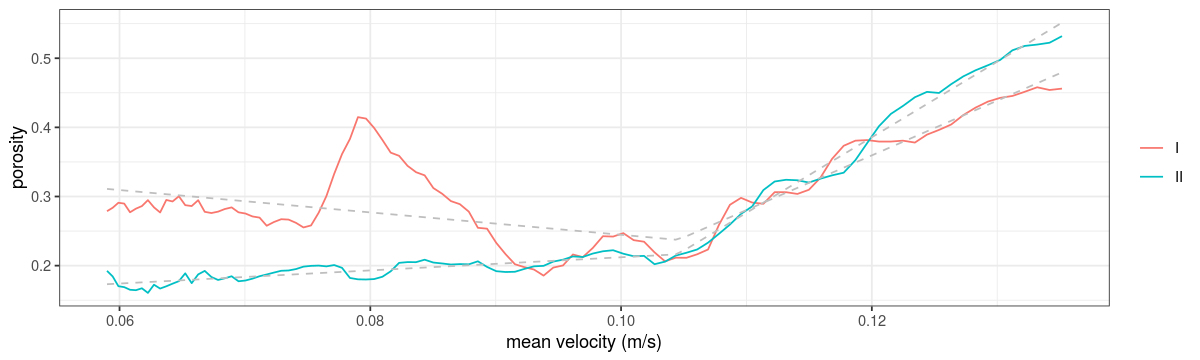

In [25]:
var='porosity'
p=ggplot(r, aes(x=speed, y=compact, color=rep))+
geom_line()+theme_bw()+theme(legend.title=element_blank())+ylab('porosity')+xlab('mean velocity (m/s)')
df=NULL
for (i in unique(r$rep)){
    d=r[r$rep==i,]
    my.lm <- lm(compact ~ speed, data=d, na.action=na.exclude)
    my.seg <- segmented(my.lm, 
                    seg.Z = ~ speed, 
                    psi = list(speed = c(0.1)))
    my.fitted <- fitted(my.seg)
    my.model <- data.frame(Distance = d$speed, Elevation = my.fitted)
    my.lines <- my.seg$psi[, 2]
    davies=davies.test(my.lm, k=13)
    davies_pval=davies$p.value
    davies_est=davies$statistic
    p=p+geom_line(data = my.model, aes(x = Distance, y = Elevation), color='gray',linetype = 2)
    df=rbind(df,c(var,i,davies_pval,davies_est,my.seg$psi[2],my.seg$psi[3], summary(my.seg)$coefficients[2,4],slope(my.seg)$speed[1,c(1,4,5)],slope(my.seg)$speed[2,c(1,4,5)],summary(my.seg)$r.squared,coefficients(summary(my.lm))[2,1],coefficients(summary(my.lm))[2,4],summary(my.lm)$r.squared))}
colnames(df)=c('variable','replicate','davies p val','davies est','break-point','se','p-value','slope1','CI.l1','CI.u1','slope2','CI.l2','CI.u2','Rsq','slope-lm','p-value-lm','Rsq-lm')
df_tot=rbind(df_tot,df)
p7=p
df_tot
p7

variable       replicate davies p val         davies est        
 [1,] volume         I         8.46168505376666e-15 0.103040544707931 
 [2,] volume         II        1.1591695636292e-36  0.103040544707931 
 [3,] growth_rel     I         7.63673887747038e-20 0.103040544707931 
 [4,] growth_rel     II        1.66223165946402e-22 0.103040544707931 
 [5,] maximum height I         7.81243537508723e-10 0.115493950984604 
 [6,] maximum height II        0.0656551261987998   0.0968138415695947
 [7,] coverage       I         2.15965511537142e-23 0.103040544707931 
 [8,] coverage       II        1.13207697459402e-21 0.0905871384312582
 [9,] porosity       I         4.45970402779685e-19 0.103040544707931 
[10,] porosity       II        3.99737436306035e-69 0.103040544707931 
[11,] a50            I         1.9767089783626e-13  0.103040544707931 
[12,] a50            II        7.24002747090343e-21 0.12172065412294  
      break-point        se                   p-value              slope1  
 [1,] 0.102597052031679  0.00222734847517     3.68018093543166e-09 -771.56 
 [2,] 0.101038317788396  0.00104815944181222  0.0019775774979863   -206.87 
 [3,] 0.104222872202864  0.00176906327131081  0.00100295628208217  -39.396 
 [4,] 0.101003288513863  0.00161789766930936  0.612519596367645    -8.511  
 [5,] 0.114979295781702  0.00226209979727066  1.56540040244437e-17 -1.4353 
 [6,] 0.0977490796587596 0.00812352941396441  2.2967990897448e-16  -4.7885 
 [7,] 0.103509661646369  0.00159811658048434  6.58711006779581e-17 -400.51 
 [8,] 0.0930512441789158 0.00165766132899621  0.00765312528228913  -80.456 
 [9,] 0.104553162690598  0.00183273877892023  2.10854374004501e-05 -1.618  
[10,] 0.104508602372504  0.000433709034155254 4.50562542081378e-18 0.95036 
[11,] 0.106445542554709  0.00223828301652008  5.84651343625348e-07 -0.58334
[12,] 0.119630578888936  0.00108602321139644  3.08770783580501e-31 -0.92846
      CI.l1   CI.u1    slope2  CI.l2   CI.u2   Rsq              
 [1,] -1008.4 -534.72  1541.7  1116.7  1966.8  0.493727828761961
 [2,] -336.05 -77.678  2414.1  2196.9  2631.3  0.923338308693313
 [3,] -62.458 -16.333  263.71  216.43  310.98  0.721002633178038
 [4,] -41.742 24.72    409.98  357.59  462.38  0.861216798208539
 [5,] -1.7106 -1.1601  -5.706  -7.116  -4.2959 0.85810343679931 
 [6,] -5.7563 -3.8207  -2.5718 -3.835  -1.3086 0.796582561830967
 [7,] -479.48 -321.54  763.74  601.87  925.62  0.658899666388551
 [8,] -139.1  -21.812  442.31  392.22  492.4   0.858736173061603
 [9,] -2.3373 -0.89879 7.9134  6.3353  9.4915  0.670824421238862
[10,] 0.77234 1.1284   10.929  10.538  11.319  0.9911469725642  
[11,] -0.8002 -0.36647 -3.0936 -3.6406 -2.5466 0.859504369917694
[12,] -1.0373 -0.81959 -5.2166 -6.1252 -4.3081 0.92959258044618 
      slope-lm          p-value-lm           Rsq-lm              
 [1,] 42.65055658285    0.573036466040429    0.00309397538364985 
 [2,] 790.098179707648  1.374631711756e-20   0.56997903455554    
 [3,] 58.4959756952644  1.04625295134795e-09 0.304571549014279   
 [4,] 150.944790209214  2.91322988716552e-22 0.600788170673914   
 [5,] -2.08935304907361 2.64780587193156e-35 0.776630715677992   
 [6,] -3.80897126072507 1.01301328514393e-35 0.780748354654365   
 [7,] -9.7874912235418  0.762681307260293    0.000889162635683834
 [8,] 197.690868748248  2.20371007506285e-22 0.602932655284879   
 [9,] 1.40499414283182  1.46709898062533e-06 0.202462667525164   
[10,] 4.12286433083011  3.35130422826732e-34 0.765378483791057   
[11,] -1.29752705038765 2.82039914120147e-31 0.732707666829273   
[12,] -1.33767205163605 6.04457600504246e-39 0.810116125466005

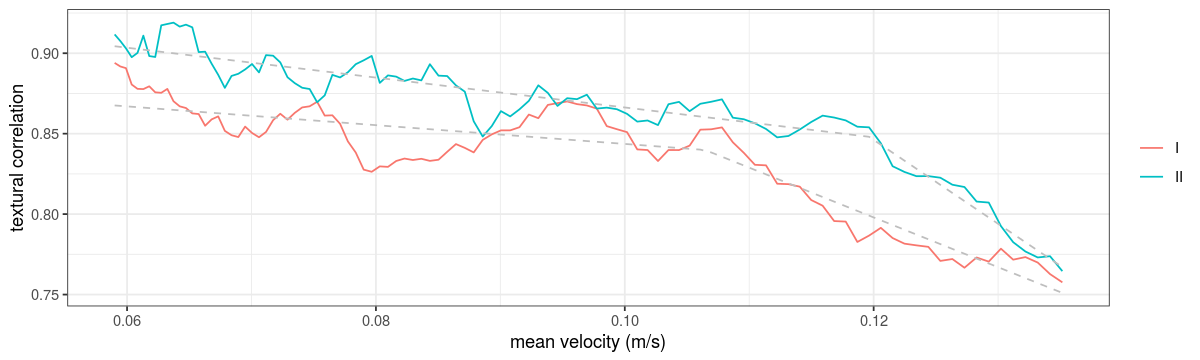

In [26]:
var='a50'
p=ggplot(r, aes(x=speed, y=a50, color=rep))+
geom_line()+theme_bw()+
theme(legend.title=element_blank())+ylab('textural correlation')+xlab('mean velocity (m/s)')
df=NULL
for (i in unique(r$rep)){
    d=r[r$rep==i,]
    my.lm <- lm(a50 ~ speed, data=d, na.action=na.exclude)
    my.seg <- segmented(my.lm, 
                    seg.Z = ~ speed, 
                    psi = list(speed = c(0.1)))
    my.fitted <- fitted(my.seg)
    my.model <- data.frame(Distance = d$speed, Elevation = my.fitted)
    my.lines <- my.seg$psi[, 2]
    davies=davies.test(my.lm, k=13)
    davies_pval=davies$p.value
    davies_est=davies$statistic
    p=p+geom_line(data = my.model, aes(x = Distance, y = Elevation), color='gray',linetype = 2)
    df=rbind(df,c(var,i,davies_pval,davies_est,my.seg$psi[2],my.seg$psi[3], summary(my.seg)$coefficients[2,4],slope(my.seg)$speed[1,c(1,4,5)],slope(my.seg)$speed[2,c(1,4,5)],summary(my.seg)$r.squared,coefficients(summary(my.lm))[2,1],coefficients(summary(my.lm))[2,4],summary(my.lm)$r.squared))}
colnames(df)=c('variable','replicate','davies p val','davies est','break-point','se','p-value','slope1','CI.l1','CI.u1','slope2','CI.l2','CI.u2','Rsq','slope-lm','p-value-lm','Rsq-lm')
df_tot=rbind(df_tot,df)
p8=p
df_tot
p8

In [27]:
df_tot=as.data.frame(df_tot)

In [28]:
df_tot$rel_slope=as.numeric(as.character(df_tot$slope2))/as.numeric(as.character(df_tot$slope1))

In [151]:
getwd()

[1] "/run/user/1001/gvfs/smb-share:domain=WORKGROUP,server=sbersrv1.epfl.ch,share=home,user=depetris/depetris/201812-1901_experiment/notebooks"

In [29]:
write.csv(df_tot,'../Tables/Davies_test.csv')
